Loading and Preprocessing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Handling Missing Values

In [2]:
print("Missing values before processing:")
print(df.isnull().sum())

columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_fix] = df[columns_to_fix].replace(0, np.nan)

df.fillna(df.median(), inplace=True)

print("Missing values after processing:")
print(df.isnull().sum())


Missing values before processing:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Missing values after processing:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Exploratory Data Analysis

<ipython-input-3-980de7089dff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette="coolwarm")


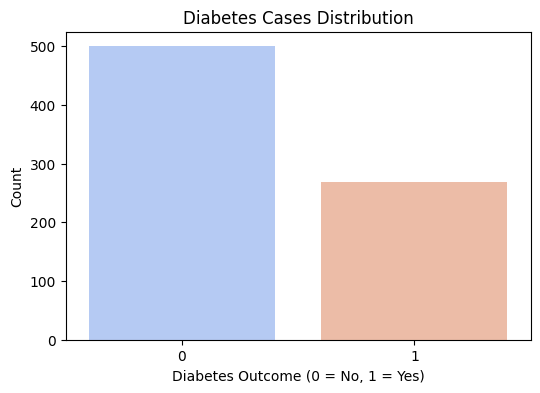

In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette="coolwarm")
plt.title("Diabetes Cases Distribution")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


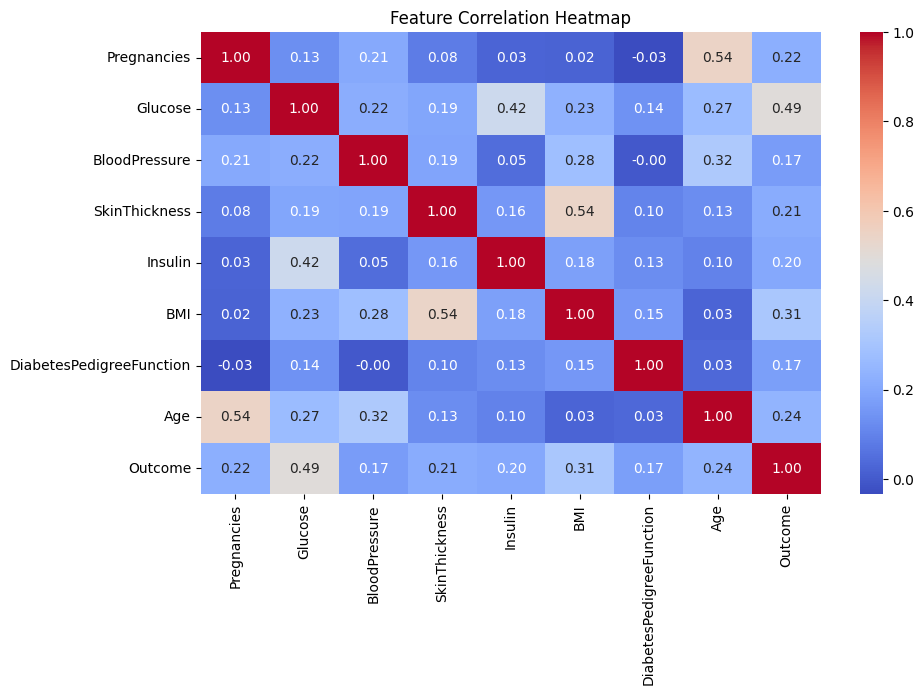

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



Statistical Analysis

In [8]:
diabetic = df[df['Outcome'] == 1]['Glucose']
non_diabetic = df[df['Outcome'] == 0]['Glucose']

t_stat, p_value = ttest_ind(diabetic, non_diabetic, equal_var=False)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: 14.852653441079662, P-Value: 3.5421485614431447e-41


Data Visualization

<ipython-input-6-3ff92b37f084>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="BMI", data=df, palette="coolwarm")


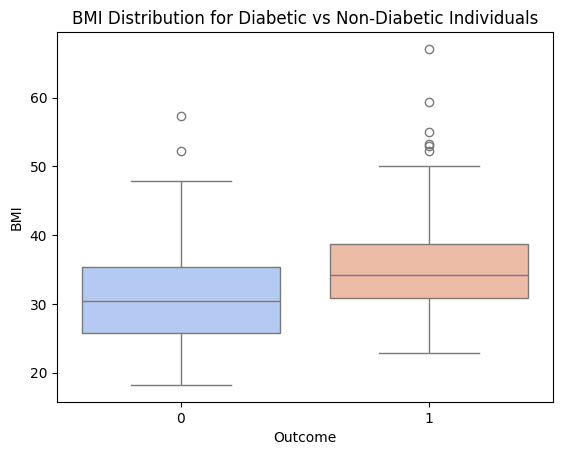

In [6]:
sns.boxplot(x="Outcome", y="BMI", data=df, palette="coolwarm")
plt.title("BMI Distribution for Diabetic vs Non-Diabetic Individuals")
plt.show()


<ipython-input-7-985a241978ba>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="Glucose", data=df, palette="coolwarm")


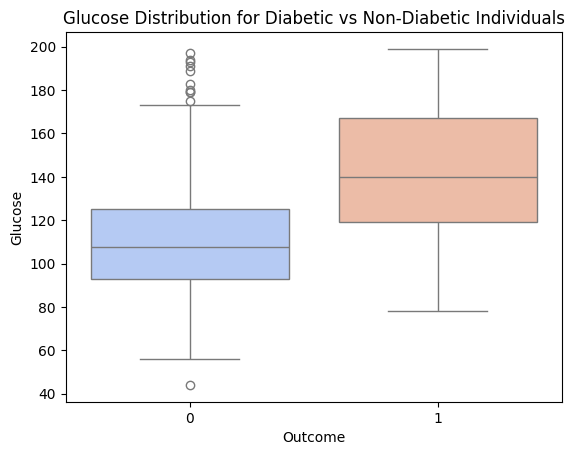

In [7]:
sns.boxplot(x="Outcome", y="Glucose", data=df, palette="coolwarm")
plt.title("Glucose Distribution for Diabetic vs Non-Diabetic Individuals")
plt.show()



Regression Analysis (Linear Regression)
Does Glucose Predict Diabetes Risk?

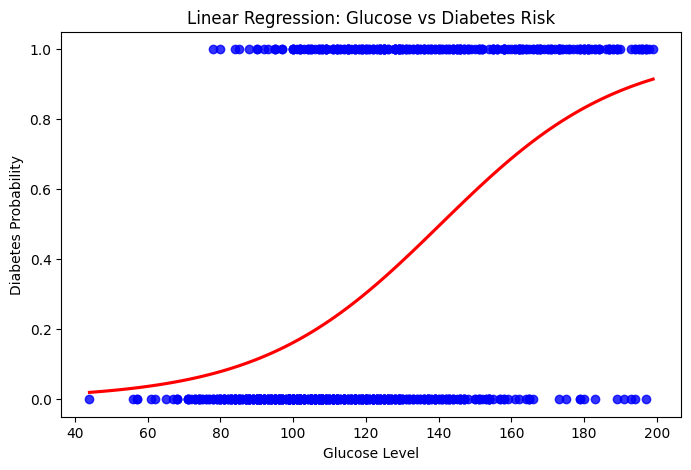

Regression Coefficient (Glucose): 0.0077


In [11]:
from sklearn.linear_model import LinearRegression

X = df[['Glucose']].values
y = df['Outcome'].values

model = LinearRegression()
model.fit(X, y)

plt.figure(figsize=(8, 5))
sns.regplot(x=X, y=y, logistic=True, ci=None, scatter_kws={"color": "blue"},
            line_kws={"color": "red"})
plt.title("Linear Regression: Glucose vs Diabetes Risk")
plt.xlabel("Glucose Level")
plt.ylabel("Diabetes Probability")
plt.show()

print(f"Regression Coefficient (Glucose): {model.coef_[0]:.4f}")


Clustering Analysis (K-Means) - Identifying Diabetes Risk Groups


<ipython-input-16-55b194564fa7>:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.median(), inplace=True)


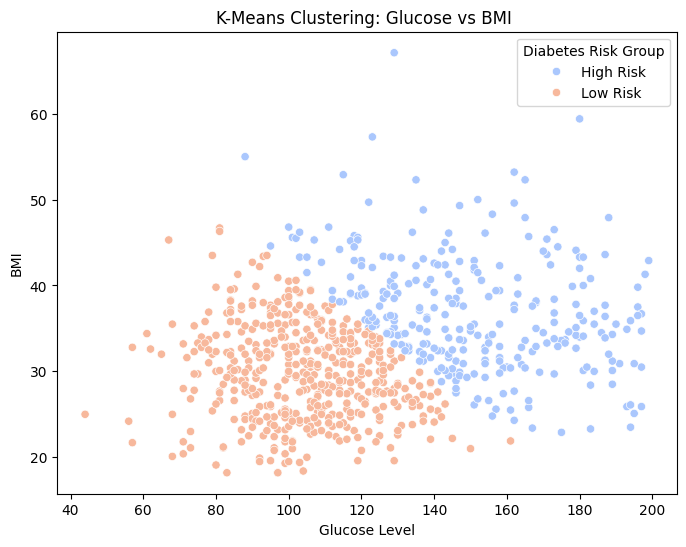

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("diabetes.csv")

columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_fix] = df[columns_to_fix].replace(0, pd.NA)


df.fillna(df.median(), inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Glucose', 'BMI']])

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=['Glucose', 'BMI'])

if centroids_df.loc[0, 'Glucose'] > centroids_df.loc[1, 'Glucose']:
    risk_mapping = {0: "High Risk", 1: "Low Risk"}
else:
    risk_mapping = {0: "Low Risk", 1: "High Risk"}

df['Risk Group'] = df['Cluster'].map(risk_mapping)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Glucose'], y=df['BMI'], hue=df['Risk Group'], palette="coolwarm")
plt.title("K-Means Clustering: Glucose vs BMI ")
plt.xlabel("Glucose Level")
plt.ylabel("BMI")
plt.legend(title="Diabetes Risk Group")
plt.show()

